In [1]:
from hmmlearn.hmm import GMMHMM
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from matplotlib import pyplot as plt
import scipy.stats as scs 

In [2]:

file = 'RB99_1m_Momentum_Momentum_750_6458_985'    #################  轴文件

L = 5      ### 1阶与X阶
diff = 1     ### 1是有HLdiff，0是没有HLdiff
mix = 3    ### GMM mix参数

####################################################################################



file_name = file + '.csv'       
df = pd.read_csv(file_name)

close = df['close']
high = df['high'][L:]
low = df['low'][L:]
eob = df['eob']
datelist = pd.to_datetime(eob[L:])


logreturn = (np.log(np.array(close[1:]))-np.log(np.array(close[:-1])))[(L-1):]
logreturnX = np.log(np.array(close[L:]))-np.log(np.array(close[:-L]))
HLdiff = (np.log(np.array(high))-np.log(np.array(low)))


closeidx = close[L:]


if diff == 1:
    X = np.column_stack([HLdiff ,logreturnX,logreturn])
    
else:
    X = np.column_stack([logreturnX,logreturn])


len(X)

6453

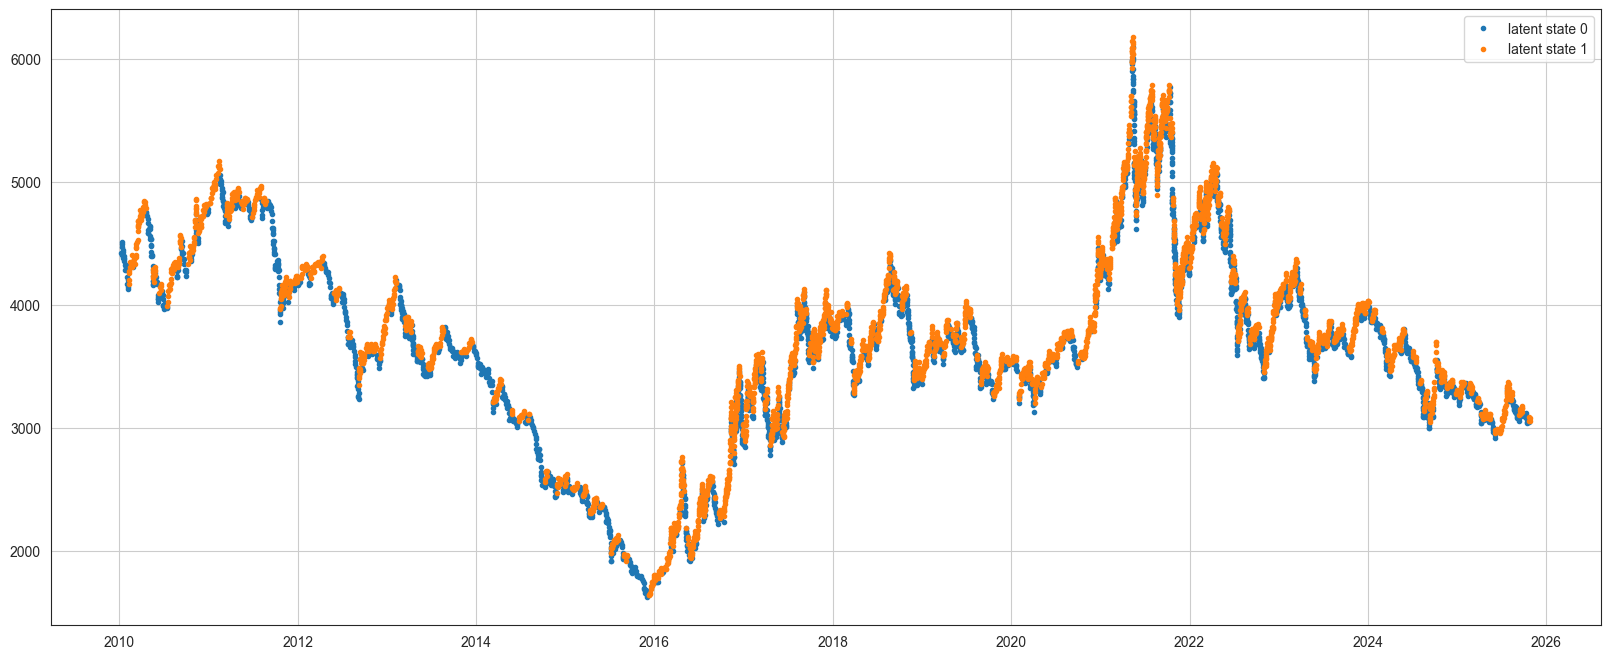

In [3]:
gmm = GMMHMM(n_components = 2, n_mix=mix, covariance_type='diag', n_iter = 369, random_state = 369).fit(X)

latent_states_sequence = gmm.predict(X)
len(latent_states_sequence)
sns.set_style('white')
plt.figure(figsize = (20, 8))
for i in range(gmm.n_components):
    state = (latent_states_sequence == i)
    plt.plot(datelist[state],closeidx[state],'.',label = 'latent state %d'%i,lw = 1)
    plt.legend()
    plt.grid(1)


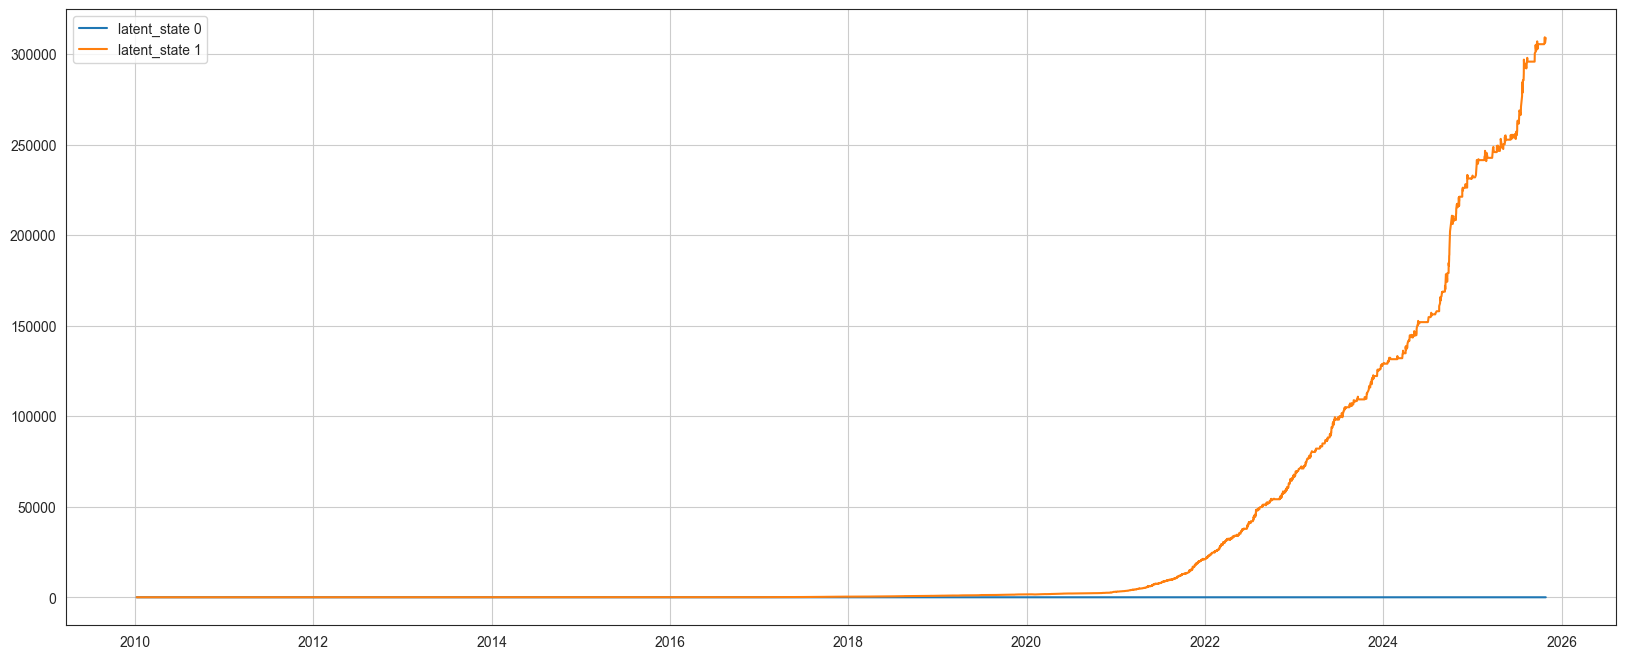

In [4]:
data = pd.DataFrame({'datelist':datelist,'logreturn':logreturn,'state':latent_states_sequence}).set_index('datelist')

plt.figure(figsize=(20,8))
for i in range(gmm.n_components):
    state = (latent_states_sequence == i)
    idx = np.append(0,state[1:])
    data['state %d_return'%i] = data.logreturn.multiply(idx,axis = 0) 
    plt.plot(np.exp(data['state %d_return' %i].cumsum()),label = 'latent_state %d'%i)
    plt.legend(loc='upper left')
    plt.grid(1)

plt.savefig("Label_a.jpg")     ##############  保存图片    #####################


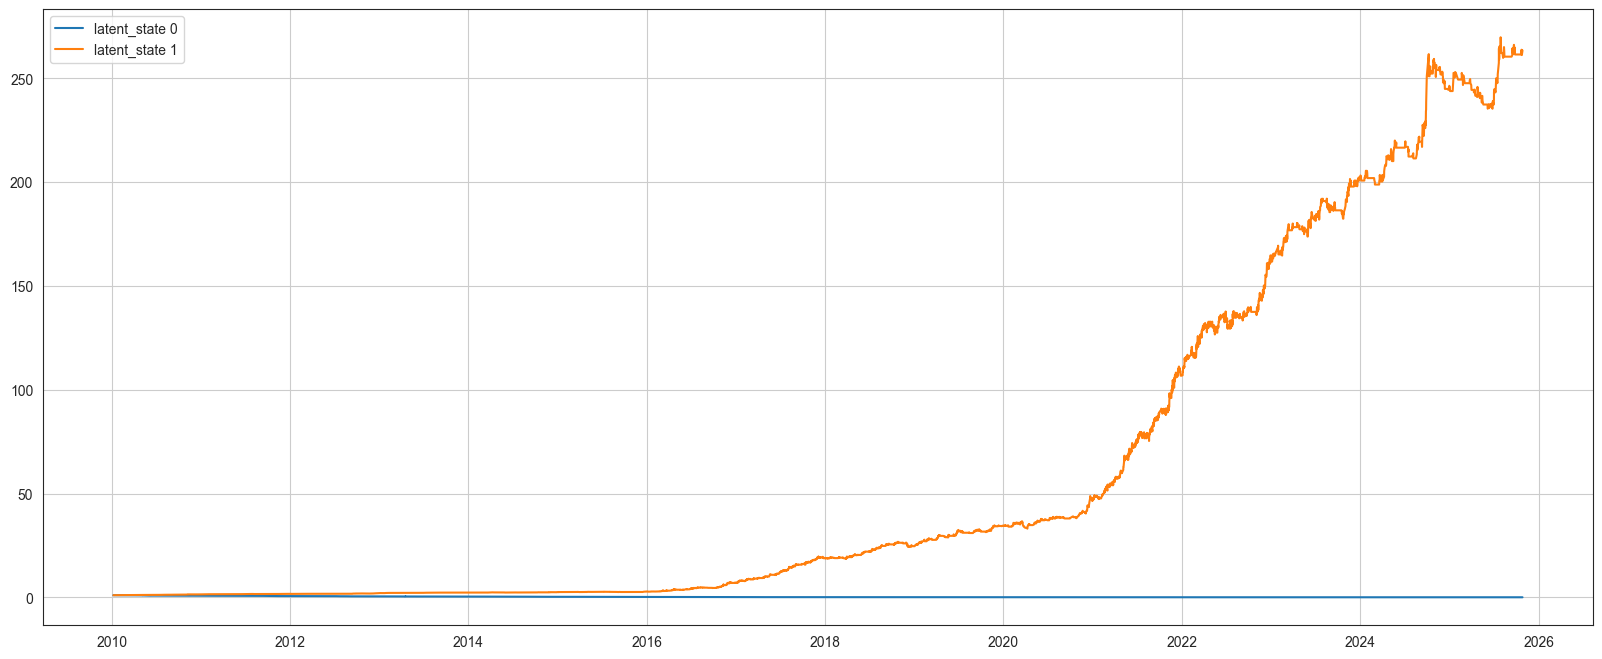

In [5]:
data = pd.DataFrame({'datelist':datelist,'logreturn':logreturn,'state':latent_states_sequence}).set_index('datelist')

plt.figure(figsize=(20,8))
for i in range(gmm.n_components):
    state = (latent_states_sequence == i)
    idx = np.append(0,state[:-1])
    data['state %d_return'%i] = data.logreturn.multiply(idx,axis = 0) 
    plt.plot(np.exp(data['state %d_return' %i].cumsum()),label = 'latent_state %d'%i)
    plt.legend(loc='upper left')
    plt.grid(1)
    
plt.savefig("Label_b.jpg")     ##############  保存图片    #####################

In [6]:
# 自动判断，将标签的 1与0，变为buy为1，sell为0

if sum(data['state 0_return']) > sum(data['state 1_return']):
    data['state'] = abs(data['state'] - 1)
    
    
    
# 标签数据导出

data.to_csv(file + "_Label_" + str(L) + str(diff) + str(mix) + ".csv")   